#📌 Extracão



### **Importação de Bibliotecas:**

**Carregamento de Dados para Análise de Churn da Telecom X**

Neste projeto de análise de dados para entender o churn de clientes da Telecom X, o primeiro e crucial passo é obter os dados. Para garantir um início suave e eficiente, vamos carregar nosso conjunto de dados JSON diretamente do GitHub. Esta abordagem garante que estamos sempre trabalhando com a versão mais atualizada e acessível dos dados, sem a necessidade de configurações complexas de outras plataformas.

**Como Funciona o Carregamento de Dados?**

O código abaixo define uma função chamada carregar_dados_do_github que é responsável por:

1. **Acessar a URL do GitHub:**
Ele faz uma requisição HTTP para a URL bruta do arquivo JSON fornecido no GitHub.
2. **Converter para DataFrame:**
 Os dados JSON são então convertidos em um DataFrame do Pandas, que é a estrutura ideal para manipulação e análise em Python.

3. **Salvar Cópia Local (Opcional):**
 Para sua conveniência, o código também oferece a opção de salvar uma cópia do arquivo JSON localmente. Isso pode ser útil para futuras referências ou para trabalhar offline.

4. **Tratamento de Erros:**
 A função inclui um robusto tratamento de erros para lidar com situações como problemas de conexão, URL inválida ou JSON mal formatado, fornecendo mensagens claras caso algo dê errado.

Este método simplificado foca em obter os dados diretamente da fonte mais confiável e acessível para o nosso projeto.

In [2]:
# Importação de bibliotecas
import pandas as pd
import requests
import json
import os

def carregar_dados(api_url, local_filename):
    """
    Função para carregar dados JSON:
    1. Tenta via API (HTTP GET)
    2. Se falhar, verifica se o arquivo local existe
    3. Converte sempre para DataFrame

    Parâmetros:
    - api_url: str -> URL de uma API pública ou endpoint direto.
    - local_filename: str -> Nome do arquivo para salvar localmente.

    Retorno:
    - DataFrame Pandas com os dados.
    """

    df = pd.DataFrame()  # Inicializa DataFrame vazio

    # 1. Tentar carregar via API
    try:
        print(f"Tentando carregar dados diretamente da API: {api_url}")
        response = requests.get(api_url, timeout=10)
        response.raise_for_status()

        data = response.json()
        print("Dados recebidos com sucesso via API.")

        # Salvar arquivo localmente
        with open(local_filename, 'w') as f:
            json.dump(data, f)
        print(f"Dados salvos localmente como '{local_filename}'.")

        df = pd.json_normalize(data)
        return df

    except requests.exceptions.RequestException as e:
        print(f"Falha ao carregar via API: {e}")

    except json.JSONDecodeError:
        print("Erro ao decodificar JSON da API.")

    # 2. Verificar se o arquivo local já existe
    if os.path.exists(local_filename):
        print(f"Arquivo local '{local_filename}' encontrado. Carregando os dados.")
        try:
            with open(local_filename, 'r') as f:
                data = json.load(f)
            print("Dados carregados com sucesso do arquivo local.")
            df = pd.json_normalize(data)
            return df
        except Exception as e:
            print(f"Erro ao carregar o arquivo local: {e}")
            return df
    else:
        print("Não foi possível obter os dados da API e o arquivo local não foi encontrado.")
        return df

# Configurações
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
local_filename = "TelecomX_Data.json"

# Execução
df = carregar_dados(api_url, local_filename)

# Verificação final
if not df.empty:
    print("\nVisualização das 5 primeiras linhas dos dados:")
    print(df.head())
else:
    print("\nNenhum dado carregado.")


Tentando carregar dados diretamente da API: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json
Dados recebidos com sucesso via API.
Dados salvos localmente como 'TelecomX_Data.json'.

Visualização das 5 primeiras linhas dos dados:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2

#🔧 Transformação

## Análise de Exploratória de dados EDA - Telecom X

Este notebook tem como objetivo realizar a **análise exploratória de dados (EDA)** sobre o comportamento de evasão de clientes da empresa **Telecom X**, utilizando um dataset público hospedado no **GitHub**.

Fluxo das etapas realizadas

1. **Carregamento de dados:**  
   - Tentativa de carregamento via **API HTTP** (link direto do GitHub).  
   - Caso falhe, tentativa de carregar o arquivo salvo **localmente**.

2. **Exploração inicial do dataset:**  
   - Visualização das **primeiras linhas** do conjunto de dados.  
   - Análise dos **tipos de dados** e **estrutura** das colunas.

3. **Geração do dicionário de dados:**  
   - Identificação automática das **colunas**, **tipos de dados** e **quantidade de valores nulos**.  
   - Geração de **descrições automáticas** para cada variável, facilitando o entendimento do conteúdo.

4. **Identificação de variáveis relevantes:**  
   - Seleção das colunas que podem ter maior impacto no fenômeno de **evasão (churn)**.

5. **Preparação para análises futuras:**  
   - A base de dados será utilizada em etapas posteriores para análises **estatísticas**, **modelagem preditiva** e desenvolvimento de **estratégias de retenção** de clientes.



**Bibliotecas utilizadas**

- **pandas**: manipulação e análise de dados  
- **requests**: requisição de dados via API HTTP  
- **json**: leitura e gravação de arquivos JSON  
- **os**: verificação de existência de arquivos locais



Este notebook, busca transformar dados brutos em **informações estratégicas** para auxiliar na **retenção de clientes**.


In [3]:
# Importação de bibliotecas
import pandas as pd
import requests
import json
import os

# 2.1 CONHECENDO O DATASET
print("Colunas e tipos:")
print(df.dtypes)
print("\nColunas:\n", df.columns.tolist())

# Função auxiliar para gerar descrições automáticas
def gerar_descricao(coluna):
    coluna_lower = coluna.lower()

    if 'id' in coluna_lower:
        return 'Identificador único do cliente'
    elif 'churn' in coluna_lower:
        return 'Indicador de evasão (Yes/No)'
    elif 'gender' in coluna_lower:
        return 'Gênero do cliente'
    elif 'senior' in coluna_lower:
        return 'Indica se o cliente é idoso'
    elif 'partner' in coluna_lower:
        return 'Indica se o cliente possui parceiro(a)'
    elif 'dependents' in coluna_lower:
        return 'Indica se o cliente possui dependentes'
    elif 'tenure' in coluna_lower:
        return 'Tempo de permanência do cliente (em meses)'
    elif 'phoneservice' in coluna_lower:
        return 'Indica se o cliente possui serviço de telefone'
    elif 'multiplelines' in coluna_lower:
        return 'Indica se o cliente possui múltiplas linhas telefônicas'
    elif 'internetservice' in coluna_lower:
        return 'Tipo de serviço de internet contratado'
    elif 'onlinebackup' in coluna_lower:
        return 'Indica se possui backup online'
    elif 'deviceprotection' in coluna_lower:
        return 'Indica se possui proteção de dispositivo'
    elif 'techsupport' in coluna_lower:
        return 'Indica se possui suporte técnico'
    elif 'streamingtv' in coluna_lower:
        return 'Indica se possui serviço de streaming de TV'
    elif 'streamingmovies' in coluna_lower:
        return 'Indica se possui serviço de streaming de filmes'
    elif 'contract' in coluna_lower:
        return 'Tipo de contrato do cliente'
    elif 'paperlessbilling' in coluna_lower:
        return 'Indica se utiliza faturamento sem papel'
    elif 'paymentmethod' in coluna_lower:
        return 'Método de pagamento escolhido'
    elif 'charges.monthly' in coluna_lower:
        return 'Valor mensal cobrado'
    elif 'charges.total' in coluna_lower:
        return 'Valor total cobrado até o momento'
    else:
        return 'Descrição não disponível (verificar manualmente)'

# Função para carregar dados
def carregar_dados(api_url, local_filename):
    df = pd.DataFrame()

    # Tentar carregar via API
    try:
        print(f"Tentando carregar dados diretamente da API: {api_url}")
        response = requests.get(api_url, timeout=10)
        response.raise_for_status()

        data = response.json()
        print("Dados recebidos com sucesso via API.")

        with open(local_filename, 'w') as f:
            json.dump(data, f)
        print(f"Dados salvos localmente como '{local_filename}'.")

        df = pd.json_normalize(data)
        return df
    except Exception as e:
        print(f"Falha ao carregar via API: {e}")

    # Verificar se o arquivo local existe
    if os.path.exists(local_filename):
        print(f"Arquivo local '{local_filename}' encontrado. Carregando os dados.")
        try:
            with open(local_filename, 'r') as f:
                data = json.load(f)
            print("Dados carregados com sucesso do arquivo local.")
            df = pd.json_normalize(data)
            return df
        except Exception as e:
            print(f"Erro ao carregar o arquivo local: {e}")
    else:
        print("Arquivo local não encontrado.")

    return df

# Configurações
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
local_filename = "TelecomX_Data.json"

# Carregar dados
df = carregar_dados(api_url, local_filename)

# Caso o DataFrame não esteja vazio, gerar e exportar dicionário de dados
if not df.empty:
    print("\nVisualização das 5 primeiras linhas dos dados:")
    print(df.head())

    # Gerar dicionário de dados
    dicionario_dados = pd.DataFrame({
        'Coluna': df.columns,
        'Tipo de Dado': df.dtypes.values,
        'Qtd Valores Nulos': df.isnull().sum().values,
        'Descrição': [gerar_descricao(col) for col in df.columns]
    })

    # Exibir o dicionário de dados completo
    pd.set_option('display.max_rows', None)  # Mostrar todas as linhas
    print("\nDicionário de Dados com descrições automáticas:")
    print(dicionario_dados)

    # Exportar para CSV
    dicionario_dados.to_csv('dicionario_dados.csv', index=False)
    print("\nDicionário de dados exportado para 'dicionario_dados.csv'.")

    # Explorar informações gerais do DataFrame
    print("\nInformações gerais sobre o DataFrame:")
    df.info()

    print("\nTipos de dados por coluna:")
    print(df.dtypes)

else:
    print("\nNenhum dado carregado. Não foi possível gerar o dicionário de dados.")


Colunas e tipos:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

Colunas:
 ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'inte

In [4]:
# Verificação de inconsistências no DataFrame

print("\n1. Verificação de valores ausentes:")
valores_nulos = df.isnull().sum()
print(valores_nulos[valores_nulos > 0])

print("\n2. Verificação de registros duplicados:")
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

if duplicados > 0:
    print("Exemplo de registros duplicados:")
    print(df[df.duplicated()].head())

print("\n3. Verificação de tipos de dados inconsistentes:")

for col in df.columns:
    tipos_unicos = df[col].apply(type).unique()
    if len(tipos_unicos) > 1:
        print(f"Atenção: Coluna '{col}' possui múltiplos tipos de dados: {tipos_unicos}")

print("\n4. Verificação de inconsistências nas categorias:")

# Selecionar colunas categóricas (object)
colunas_categoricas = df.select_dtypes(include=['object']).columns

for col in colunas_categoricas:
    valores_unicos = pd.unique(df[col])
    print(f"\nColuna '{col}' possui {len(valores_unicos)} categorias únicas:")
    print(valores_unicos)

print("\n5. Verificação de colunas numéricas com valores extremos (outliers):")

colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

for col in colunas_numericas:
    print(f"\nAnalisando coluna numérica: {col}")
    print(df[col].describe())

print("\n6. Verificação de colunas de data (se houver) e normalização:")

# Selecionar colunas de data
colunas_data = df.select_dtypes(include=['datetime64']).columns

for col in colunas_data:
    print(f"Normalizando coluna de data: {col}")
    df[col] = df[col].dt.normalize()

if len(colunas_data) == 0:
    print("Nenhuma coluna de data identificada para normalização.")

print("\nVerificação de inconsistências concluída.")



1. Verificação de valores ausentes:
Series([], dtype: int64)

2. Verificação de registros duplicados:
Número de registros duplicados: 0

3. Verificação de tipos de dados inconsistentes:

4. Verificação de inconsistências nas categorias:

Coluna 'customerID' possui 7267 categorias únicas:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Coluna 'Churn' possui 3 categorias únicas:
['No' 'Yes' '']

Coluna 'customer.gender' possui 2 categorias únicas:
['Female' 'Male']

Coluna 'customer.Partner' possui 2 categorias únicas:
['Yes' 'No']

Coluna 'customer.Dependents' possui 2 categorias únicas:
['Yes' 'No']

Coluna 'phone.PhoneService' possui 2 categorias únicas:
['Yes' 'No']

Coluna 'phone.MultipleLines' possui 3 categorias únicas:
['No' 'Yes' 'No phone service']

Coluna 'internet.InternetService' possui 3 categorias únicas:
['DSL' 'Fiber optic' 'No']

Coluna 'internet.OnlineSecurity' possui 3 categorias únicas:
['No' 'Yes' 'No internet service']

Coluna

## Análise dos dados

Este código realiza uma análise diagnóstica da qualidade dos dados no DataFrame df, e sugere ações de limpeza com base em:

Valores ausentes → identifica e sugere preenchimento ou remoção.

Duplicatas → identifica e sugere remoção.

Tipos de dados inconsistentes → identifica colunas com múltiplos tipos e sugere unificação.

Inconsistências em categorias → verifica diferenças de capitalização e sugere padronização.

Outliers → detecta usando método do IQR e sugere avaliar tratamento.

Colunas de data → detecta colunas datetime e sugere normalização.





In [5]:
print("\n=== Limpeza de Dados ===")

# 1. Valores ausentes
nulos = df.isnull().sum()
colunas_com_nulos = nulos[nulos > 0]

if not colunas_com_nulos.empty:
    print("\n1. Preenchimento ou remoção de valores ausentes:")
    for col, qtd in colunas_com_nulos.items():
        perc = (qtd / len(df)) * 100
        print(f" - Coluna '{col}' possui {qtd} valores nulos ({perc:.2f}%).")
        if perc < 5:
            print("   -> Sugestão: Pode ser preenchida com valor mais frequente ou média.")
        else:
            print("   -> Sugestão: Avaliar se deve ser removida ou preenchida com critério específico.")
else:
    print("\n1. Nenhuma coluna possui valores ausentes.")

# 2. Duplicados
duplicados = df.duplicated().sum()


if duplicados > 0:
    print(f"\n2. {duplicados} registros duplicados encontrados.")
    print("   -> Sugestão: Remover duplicatas usando df.drop_duplicates(inplace=True).")
else:
    print("\n2. Nenhum registro duplicado encontrado.")

# 3. Tipos de dados inconsistentes
print("\n3. Verificação de tipos de dados inconsistentes:")
for col in df.columns:
    tipos_unicos = df[col].apply(type).unique()
    if len(tipos_unicos) > 1:
        print(f" - Coluna '{col}' possui múltiplos tipos: {tipos_unicos}")
        print("   -> Sugestão: Unificar tipos, por exemplo, convertendo todos para string ou numérico.")

# 4. Inconsistências em categorias
print("\n4. Verificação de inconsistências nas categorias:")
for col in colunas_categoricas:
    valores_unicos = pd.unique(df[col])
    valores_lower = [str(val).lower() for val in valores_unicos if pd.notnull(val)]
    if len(set(valores_lower)) < len(valores_unicos):
        print(f" - Coluna '{col}' pode conter inconsistências de capitalização ou formatação.")
        print("   -> Sugestão: Padronizar com df['coluna'] = df['coluna'].str.lower().str.strip()")

# 5. Outliers em variáveis numéricas
print("\n5. Detecção de possíveis outliers:")
for col in colunas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    if not outliers.empty:
        print(f" - Coluna '{col}' possui {len(outliers)} possíveis outliers.")
        print("   -> Sugestão: Avaliar a necessidade de remoção ou tratamento.")

# 6. Colunas de data
if len(colunas_data) > 0:
    print("\n6. Colunas de data encontradas:")
    for col in colunas_data:
        print(f" - '{col}' -> Normalizar datas com df['{col}'] = df['{col}'].dt.normalize()")
else:
    print("\n6. Nenhuma coluna de data encontrada.")

print("\n=== Fim das sugestões de limpeza ===")



=== Limpeza de Dados ===

1. Nenhuma coluna possui valores ausentes.

2. Nenhum registro duplicado encontrado.

3. Verificação de tipos de dados inconsistentes:

4. Verificação de inconsistências nas categorias:

5. Detecção de possíveis outliers:
 - Coluna 'customer.SeniorCitizen' possui 1182 possíveis outliers.
   -> Sugestão: Avaliar a necessidade de remoção ou tratamento.

6. Nenhuma coluna de data encontrada.

=== Fim das sugestões de limpeza ===


## Limpeza e Correção Otimizadas dos Dados

Este bloco de código executa um **processo completo e automatizado de limpeza e correção dos dados**, com o objetivo de garantir que o dataset esteja **pronto e consistente** para as próximas etapas da análise e modelagem.

### Etapas realizadas:

1. **Remoção de registros duplicados:**  
   - Elimina linhas repetidas que podem distorcer análises estatísticas e modelagens.

2. **Preenchimento de valores ausentes:**  
   - Para colunas **numéricas** → preenchimento com a **média**.  
   - Para colunas **categóricas** → preenchimento com a **moda** (valor mais frequente).

3. **Padronização de strings:**  
   - Conversão de todas as variáveis categóricas para **minúsculas** e remoção de **espaços em excesso**, garantindo uniformidade.

4. **Correção de inconsistências específicas:**  
   - Padronização de respostas como `'no internet service'` e `'no phone service'` para `'no'`, simplificando a análise das categorias.

5. **Correção de formatação numérica:**  
   - Identificação de colunas com **strings numéricas** e conversão automática para **valores numéricos**, evitando erros em cálculos.

6. **Correção de tipos inconsistentes:**  
   - Uniformização dos tipos de dados em colunas que possuem **valores mistos**, convertendo adequadamente para **string** ou **numérico**.

7. **Normalização de colunas de data:**  
   - Se houver colunas `datetime`, aplica-se **normalização**, removendo informações de hora para padronizar datas.

8. **Detecção de outliers:**  
   - Identificação de valores **atípicos** utilizando o método do **Intervalo Interquartil (IQR)**.  
   - Os outliers **não são removidos automaticamente**, mas são reportados para análise posterior.

---

 **Objetivo**  
Garantir que o dataset esteja **limpo, consistente e padronizado**, minimizando riscos de erros e distorções nas análises estatísticas e nos modelos preditivos.

**Observação:**  
Este processo automatiza várias etapas essenciais de **Data Cleaning** e pode ser facilmente adaptado conforme características específicas de outros datasets.



In [6]:
#Limpeza e Correção Otimizadas dos Dados

print("\n=== Iniciando Limpeza e Correções Otimizadas ===")

# 1. Remover registros duplicados
duplicados = df.duplicated().sum()
if duplicados > 0:
    df.drop_duplicates(inplace=True)
    print(f"1. {duplicados} registros duplicados removidos.")
else:
    print("1. Nenhum registro duplicado encontrado.")

# 2. Preenchimento de valores ausentes
for col in df.columns:
    nulos = df[col].isnull().sum()
    if nulos > 0:
        if df[col].dtype in ['float64', 'int64']:
            media = df[col].mean()
            df[col].fillna(media, inplace=True)
            print(f"2. Coluna '{col}': {nulos} valores nulos preenchidos com média {media:.2f}.")
        else:
            moda = df[col].mode()[0]
            df[col].fillna(moda, inplace=True)
            print(f"2. Coluna '{col}': {nulos} valores nulos preenchidos com moda '{moda}'.")

# 3. Padronização de strings: minúsculas e remoção de espaços
colunas_categoricas = df.select_dtypes(include=['object']).columns
for col in colunas_categoricas:
    df[col] = df[col].str.lower().str.strip()
    print(f"3. Coluna '{col}' padronizada: minúsculas e sem espaços.")

# 4. Correção de inconsistências específicas
for col in colunas_categoricas:
    df[col] = df[col].replace({
        'no internet service': 'no',
        'no phone service': 'no'
    })
print("4. Correção de categorias específicas aplicada ('no internet service' → 'no').")

# 5. Correção de formatação numérica: strings numéricas mal formatadas
for col in colunas_categoricas:
    # Detectar se a coluna tem valores numéricos mal formatados
    if df[col].str.replace('.', '', 1).str.isdigit().any():
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"5. Coluna '{col}' convertida de string para numérico.")

# 6. Correção de tipos inconsistentes
for col in df.columns:
    tipos_unicos = df[col].apply(type).unique()
    if len(tipos_unicos) > 1:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str)
            print(f"6. Coluna '{col}' convertida para string para unificação de tipos.")
        elif df[col].dtype in ['float64', 'int64']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"6. Coluna '{col}' convertida para numérico com coerção de erros.")

# 7. Normalização de colunas de data (se houver)
colunas_data = df.select_dtypes(include=['datetime64']).columns
for col in colunas_data:
    df[col] = df[col].dt.normalize()
    print(f"7. Coluna de data '{col}' normalizada.")

if not colunas_data.any():
    print("7. Nenhuma coluna de data encontrada.")

# 8. Detecção de outliers: marcação, mas não remoção automática
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
for col in colunas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    if not outliers.empty:
        print(f"8. Coluna '{col}' possui {len(outliers)} possíveis outliers identificados.")
        print("   -> Atenção: Não foram removidos automaticamente. Avaliar conforme contexto.")
    else:
        print(f"8. Coluna '{col}' sem outliers significativos detectados.")

print("\n=== Limpeza e Correções Otimizadas Concluídas ===")



=== Iniciando Limpeza e Correções Otimizadas ===
1. Nenhum registro duplicado encontrado.
3. Coluna 'customerID' padronizada: minúsculas e sem espaços.
3. Coluna 'Churn' padronizada: minúsculas e sem espaços.
3. Coluna 'customer.gender' padronizada: minúsculas e sem espaços.
3. Coluna 'customer.Partner' padronizada: minúsculas e sem espaços.
3. Coluna 'customer.Dependents' padronizada: minúsculas e sem espaços.
3. Coluna 'phone.PhoneService' padronizada: minúsculas e sem espaços.
3. Coluna 'phone.MultipleLines' padronizada: minúsculas e sem espaços.
3. Coluna 'internet.InternetService' padronizada: minúsculas e sem espaços.
3. Coluna 'internet.OnlineSecurity' padronizada: minúsculas e sem espaços.
3. Coluna 'internet.OnlineBackup' padronizada: minúsculas e sem espaços.
3. Coluna 'internet.DeviceProtection' padronizada: minúsculas e sem espaços.
3. Coluna 'internet.TechSupport' padronizada: minúsculas e sem espaços.
3. Coluna 'internet.StreamingTV' padronizada: minúsculas e sem espaços

## Visualização do Impacto dos Outliers

Este código demonstra, por meio de **gráficos**, como outliers influenciam:

1. **Distribuições de dados:**  
   - Boxplots mostram que outliers aparecem como pontos isolados fora do "box", estendendo a cauda da distribuição.

2. **Modelos estatísticos:**  
   - Regressão sem outliers → linha bem ajustada.  
   - Regressão com outliers → linha **distorcida** pela presença de valores extremos.

**Objetivo:**  
- Evidenciar a **importância de detectar e tratar outliers** para evitar interpretações erradas e modelos preditivos ineficazes.


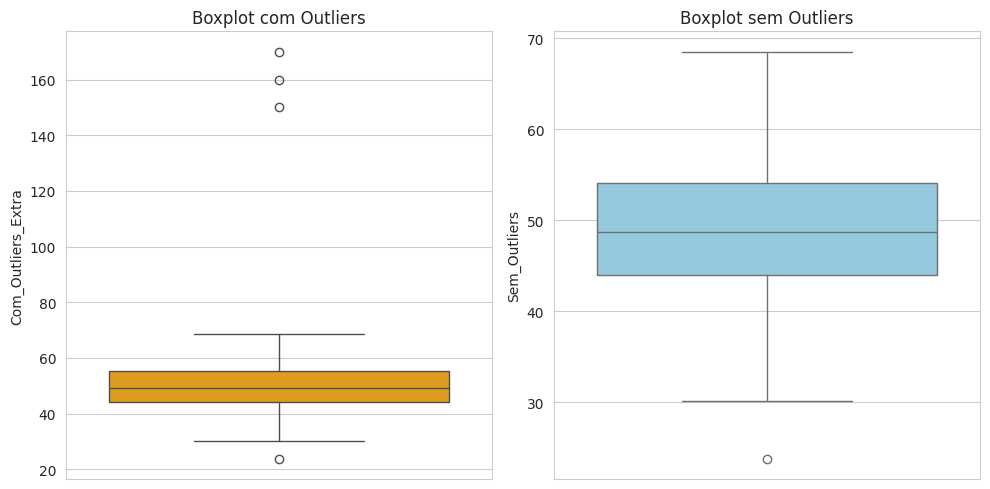

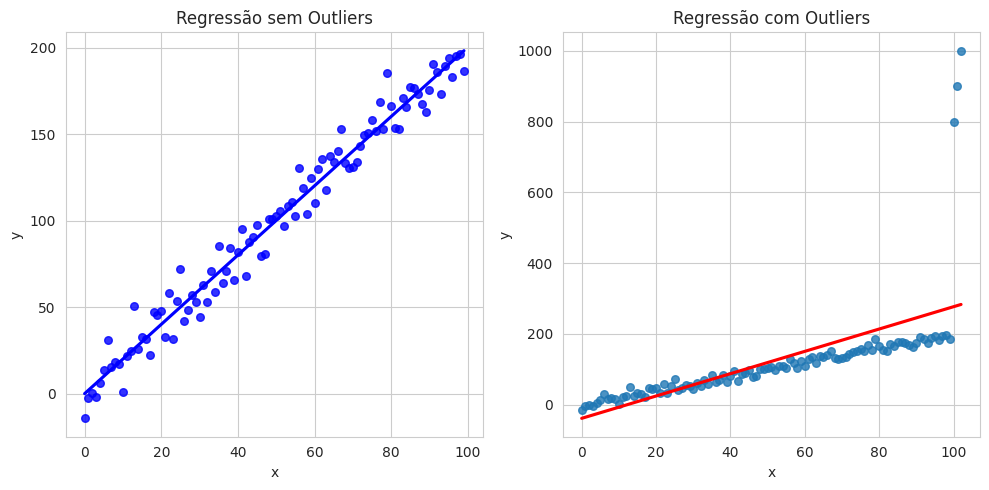

In [7]:
# Grafico Outliers

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Fixar a semente para reprodução
np.random.seed(42)

# Criar dados normais
dados_normais = np.random.normal(loc=50, scale=10, size=100)

# Padronizar colunas de resposta Sim/Não
colunas_binarias = ['ProtecaoOnline', 'BackupNuvem', 'AtendimentoPremium']
for col in colunas_binarias:
    if col in df.columns:
        df[col] = df[col].map({'Sim': 1, 'Não': 0})

# Padronizar coluna de churn
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].astype(str).str.lower().str.strip()
    df['Churn'] = df['Churn'].replace({'sim': 'Perda de Cliente', 'não': 'Cliente Retido'})

# Adicionar outliers
dados_com_outliers = np.append(dados_normais, [150, 160, 170])

# Criar DataFrames com tamanhos compatíveis

# DataFrame 1: comparativo sem e com outliers (mesmo tamanho)
df_outlier = pd.DataFrame({
    'Sem_Outliers': dados_normais,
    'Com_Outliers': dados_com_outliers[:100]  # cortar para mesmo tamanho
})

# DataFrame 2: completo com outliers
df_completo = pd.DataFrame({
    'Com_Outliers_Extra': dados_com_outliers
})

# ===== BOXPLOTS =====

plt.figure(figsize=(10, 5))

# Boxplot com outliers extras
plt.subplot(1, 2, 1)
sns.boxplot(y=df_completo['Com_Outliers_Extra'], color='orange')
plt.title('Boxplot com Outliers')

# Boxplot sem outliers
plt.subplot(1, 2, 2)
sns.boxplot(y=df_outlier['Sem_Outliers'], color='skyblue')
plt.title('Boxplot sem Outliers')

plt.tight_layout()
plt.show()

# ===== REGRESSÃO =====

# Criar variável independente
x = np.arange(len(dados_com_outliers))  # tamanho 103

# Criar variável dependente com relação linear + ruído
y_sem_outliers = 2 * x[:100] + np.random.normal(0, 10, size=100)
y_com_outliers = np.append(y_sem_outliers, [800, 900, 1000])  # adicionar outliers

# DataFrames para regressão
df_reg_sem = pd.DataFrame({'x': x[:100], 'y': y_sem_outliers})
df_reg_com = pd.DataFrame({'x': x, 'y': y_com_outliers})

# Plot regressão

plt.figure(figsize=(10, 5))

# Regressão sem outliers
plt.subplot(1, 2, 1)
sns.regplot(x='x', y='y', data=df_reg_sem, ci=None, scatter_kws={'s': 30}, color='blue')
plt.title('Regressão sem Outliers')

# Regressão com outliers
plt.subplot(1, 2, 2)
sns.regplot(x='x', y='y', data=df_reg_com, ci=None, scatter_kws={'s': 30}, line_kws={'color': 'red'})
plt.title('Regressão com Outliers')

plt.tight_layout()
plt.show()



## Criação da Coluna - `Contas_Diarias`

Com os dados devidamente **limpos e padronizados**, nesta etapa criamos a coluna **`Contas_Diarias`** a partir do faturamento mensal (`account.Charges.Monthly`), dividindo esse valor por **30 dias**.

**Por que criar essa coluna?**

- Proporciona uma **visão mais granular** sobre o comportamento financeiro dos clientes.  
- Facilita a análise de **tendências e padrões de consumo diário**.  
- Pode ser uma variável **relevante** para modelos preditivos, segmentações e políticas de retenção.

**Como foi calculada:**

\[
\text{Contas\_Diarias} = \frac{\text{Faturamento Mensal}}{30}
\]

Esse cálculo **simplifica** a visualização e compreensão do gasto médio **diário** dos clientes.

**Exemplo prático:**

Se um cliente possui um faturamento mensal de **R$ 90,00**, o valor de `Contas_Diarias` será:  

\[
\frac{90}{30} = R\$ 3,00 \text{ por dia}
\]

---

Este indicador permitirá que, nas próximas etapas, possamos realizar análises mais detalhadas e precisas sobre o **comportamento e perfil financeiro** dos clientes.


In [8]:
print("\n=== Criando coluna 'Contas_Diarias' ===")

# Verificar se a coluna de faturamento mensal existe
coluna_faturamento = 'account.Charges.Monthly'

if coluna_faturamento in df.columns:
    # Garantir que a coluna seja numérica
    df[coluna_faturamento] = pd.to_numeric(df[coluna_faturamento], errors='coerce')

    # Criar a nova coluna: valor diário
    df['Contas_Diarias'] = df[coluna_faturamento] / 30

    print(" Coluna 'Contas_Diarias' criada com sucesso.")
    print("\nExemplo das primeiras linhas:")
    print(df[['account.Charges.Monthly', 'Contas_Diarias']].head())
else:
    print(f"❌ Coluna '{coluna_faturamento}' não encontrada no DataFrame.")



=== Criando coluna 'Contas_Diarias' ===
 Coluna 'Contas_Diarias' criada com sucesso.

Exemplo das primeiras linhas:
   account.Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667


##  Padronização e Transformação de Dados

A **padronização e transformação de dados** é uma etapa **altamente recomendada** no processo de análise, pois busca tornar as informações mais:

 **Consistentes**  
 **Compreensíveis**  
**Adequadas para análise e modelagem**  

 **Por que padronizar e transformar dados?**

- Facilita o **processamento matemático** e a aplicação de **modelos analíticos**.  
- Melhora a **clareza** e **comunicação** dos resultados.  
- Evita **ambiguidade** ou **confusões**, especialmente ao compartilhar relatórios com **stakeholders não técnicos**.



 **Exemplos práticos de transformação:**

- Converter valores textuais como **"Sim"** e **"Não"** em **valores binários**:  
  - **"Sim" → 1**  
  - **"Não" → 0**

- Traduzir ou **renomear colunas**:  
  - De termos técnicos para nomes mais **amigáveis** e **acessíveis**.  
  - Exemplo: `customer.tenure` → `Tempo_de_Contrato`.



**Benefícios desta etapa:**

- Torna os dados mais **uniformes** e **padronizados**, reduzindo riscos de erros de interpretação.  
- Facilita a construção de **modelos de Machine Learning**, que exigem dados numéricos ou codificados.  
- Melhora a **compreensão** para públicos variados, incluindo gestores e outros stakeholders.

**O que este código faz**

1. Conversão binária:
Converte valores como "Sim", "Não", "Yes", "No" para 1 e 0.

Identifica automaticamente as colunas que possuem esses valores.

2. Renomeação de colunas:
De nomes técnicos ou compostos para nomes mais amigáveis e legíveis.

Melhora a clareza para análises e apresentações.


✅ Exemplo de renomeação:

Antes                   	 → Depois

account.Charges.Monthly	   → Faturamento_Mensal

internet.StreamingTV	     → Streaming_TV

customer.tenure	           → Tempo_de_Contrato



**Conclusão:**  
Realizar esta etapa prepara o dataset para análises **mais robustas** e relatórios **mais claros**, elevando a qualidade da entrega analítica.


In [9]:
print("\n=== Padronização e Transformação de Dados ===")

# 1. Conversão de valores textuais "sim"/"não" para binários (1/0)

# Identificar colunas com respostas "sim"/"não"
colunas_binarias = []

for col in df.columns:
    if df[col].dtype == 'object':
        valores_unicos = df[col].dropna().unique()
        valores_lower = [str(v).lower().strip() for v in valores_unicos]
        if set(valores_lower).issubset({'sim', 'não', 'nao', 'yes', 'no'}):
            colunas_binarias.append(col)

print(f"\n1. Colunas identificadas para conversão binária: {colunas_binarias}")

# Aplicar conversão: "sim"/"yes" → 1, "não"/"no"/"nao" → 0
for col in colunas_binarias:
    df[col] = df[col].str.lower().str.strip().replace({'sim': 1, 'yes': 1, 'não': 0, 'nao': 0, 'no': 0})
    print(f"   - Coluna '{col}' convertida para valores binários (1/0).")

# 2. Renomeação de colunas para nomes mais legíveis

# Dicionário de renomeação: {nome_original: nome_novo}
mapeamento_colunas = {
    'customer.tenure': 'Tempo_de_Contrato',
    'account.Charges.Monthly': 'Faturamento_Mensal',
    'account.Charges.Total': 'Faturamento_Total',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Sem_Papel',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'phone.PhoneService': 'Servico_Telefone',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Tem_Parceiro',
    'customer.Dependents': 'Tem_Dependentes'
}

# Renomear colunas
df.rename(columns=mapeamento_colunas, inplace=True)

print("\n2. Colunas renomeadas para nomes mais claros e legíveis.")

# Exibir exemplo das primeiras colunas
print("\nColunas atuais após renomeação:")
print(list(df.columns))

print("\n=== Padronização e Transformação concluídas ===")



=== Padronização e Transformação de Dados ===

1. Colunas identificadas para conversão binária: ['customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.PaperlessBilling']
   - Coluna 'customer.Partner' convertida para valores binários (1/0).
   - Coluna 'customer.Dependents' convertida para valores binários (1/0).
   - Coluna 'phone.PhoneService' convertida para valores binários (1/0).
   - Coluna 'phone.MultipleLines' convertida para valores binários (1/0).
   - Coluna 'internet.OnlineSecurity' convertida para valores binários (1/0).
   - Coluna 'internet.OnlineBackup' convertida para valores binários (1/0).
   - Coluna 'internet.DeviceProtection' convertida para valores binários (1/0).
   - Coluna 'internet.TechSupport' convertida para valores binários (1/0).
   - Coluna 'internet.Stream

<ipython-input-9-7f212bc5c587>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].str.lower().str.strip().replace({'sim': 1, 'yes': 1, 'não': 0, 'nao': 0, 'no': 0})


#📊 Carga e análise

##  Análise Descritiva dos Dados

Nesta etapa, realizamos a **Análise Descritiva** para obter uma visão **quantitativa** do comportamento dos clientes.  

**O que foi calculado:**

- **Média:** medida de tendência central, representa o valor médio.  
- **Mediana:** ponto central da distribuição, menos afetado por outliers.  
- **Desvio Padrão:** medida de dispersão, indica quão distante os valores estão da média.  
- **Mínimo e Máximo:** indicam a **amplitude** dos dados.  

**Por que é importante?**

- Identifica **distribuições assimétricas** ou **anomalias**.  
- Ajuda a compreender a **variação** dos gastos e comportamentos dos clientes.  
- Fundamenta decisões em processos de **segmentação** e **modelagem preditiva**.

---

**Observação:** A análise foi feita para todas as variáveis numéricas e também uma visão geral de todo o dataset.



 Análise Descritiva dos Dados 

1. Estatísticas descritivas gerais:
        customerID Churn Genero        Idoso  Tem_Parceiro  Tem_Dependentes  \
count         7267  7267   7267  7267.000000   7267.000000      7267.000000   
unique        7267     3      2          NaN           NaN              NaN   
top     9995-hotoh    no   male          NaN           NaN              NaN   
freq             1  5174   3675          NaN           NaN              NaN   
mean           NaN   NaN    NaN     0.162653      0.484106         0.300124   
std            NaN   NaN    NaN     0.369074      0.499782         0.458343   
min            NaN   NaN    NaN     0.000000      0.000000         0.000000   
25%            NaN   NaN    NaN     0.000000      0.000000         0.000000   
50%            NaN   NaN    NaN     0.000000      0.000000         0.000000   
75%            NaN   NaN    NaN     0.000000      1.000000         1.000000   
max            NaN   NaN    NaN     1.000000      1.000000    

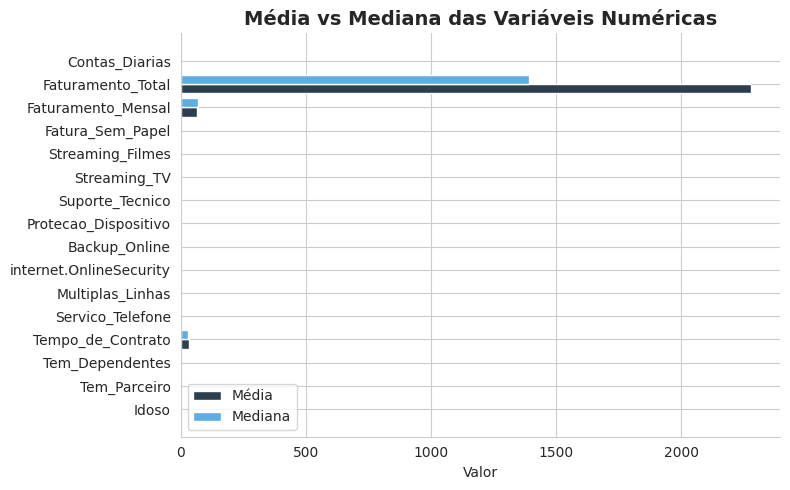

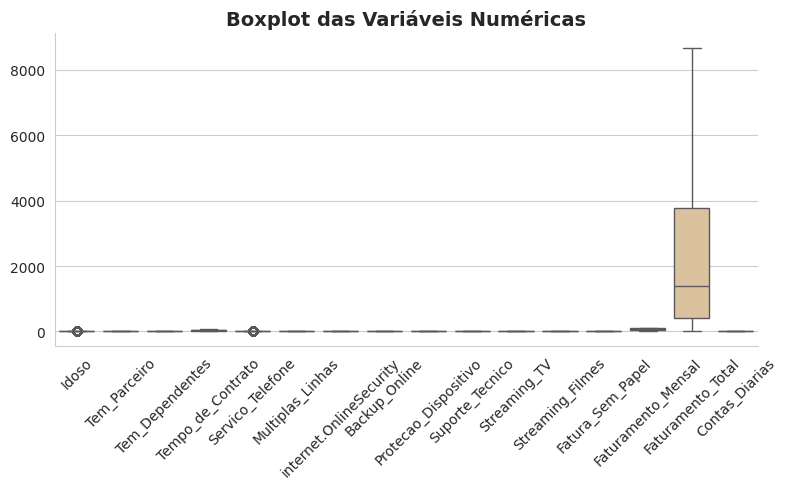

In [14]:
# Análise Descritiva dos Dados

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Garantir estilo limpo
sns.set_style("whitegrid")

print("\n Análise Descritiva dos Dados ")

# 1. Estatísticas gerais
descricao_geral = df.describe(include='all')
print("\n1. Estatísticas descritivas gerais:")
print(descricao_geral)

# 2. Estatísticas descritivas por coluna numérica
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
print("\n2. Estatísticas descritivas para colunas numéricas:")

# Criar DataFrame para consolidar os dados
resumo = []
for col in colunas_numericas:
    media = df[col].mean()
    mediana = df[col].median()
    desvio = df[col].std()
    minimo = df[col].min()
    maximo = df[col].max()

    print(f"\nColuna: {col}")
    print(f" - Média: {media:.2f}")
    print(f" - Mediana: {mediana:.2f}")
    print(f" - Desvio Padrão: {desvio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")

    resumo.append({
        'Variável': col,
        'Média': media,
        'Mediana': mediana,
        'Desvio Padrão': desvio,
        'Mínimo': minimo,
        'Máximo': maximo
    })

df_resumo = pd.DataFrame(resumo)

# === GRÁFICO 1: Comparativo de Média vs Mediana ===
plt.figure(figsize=(8, 5))
bar_width = 0.4
indices = np.arange(len(df_resumo))

plt.barh(indices, df_resumo['Média'], bar_width, label='Média', color='#2C3E50')
plt.barh(indices + bar_width, df_resumo['Mediana'], bar_width, label='Mediana', color='#5DADE2')

plt.yticks(indices + bar_width / 2, df_resumo['Variável'])
plt.xlabel('Valor')
plt.title('Média vs Mediana das Variáveis Numéricas', fontsize=14, weight='bold')
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

# === GRÁFICO 2: Boxplots para Análise Visual de Dispersão ===
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[colunas_numericas], palette='Set2')
plt.title('Boxplot das Variáveis Numéricas', fontsize=14, weight='bold')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()


## Análise da Distribuição de Evasão

Nesta etapa, realizamos a **visualização da distribuição** da variável **`Churn`**, que indica se um cliente **permaneceu** ou **deixou** a empresa.

**Por que esta análise é importante?**

- Ajuda a entender a **proporção de evasão** no conjunto de clientes.  
- É fundamental para definir **estratégias de retenção**.  
- Fornece **insumos** para criação de modelos preditivos de **Churn**.


 **Como foi visualizado:**

1. **Gráfico de Barras:**  
   - Mostra a quantidade absoluta de clientes que saíram e que permaneceram.

2. **Gráfico de Pizza:**  
   - Apresenta a **proporção relativa** entre as duas categorias.


Esta análise oferece uma visão **clara e imediata** sobre o desafio da **evasão de clientes**, orientando as próximas etapas da análise.



=== Tratamento Automático de Valores Vazios/Nulos na Coluna 'Churn' ===
Valores vazios detectados: 224
Valores nulos detectados: 0
 Valores vazios e nulos preenchidos automaticamente com 'no'.

Verificação pós-tratamento:
no: 5.398
yes: 1.869


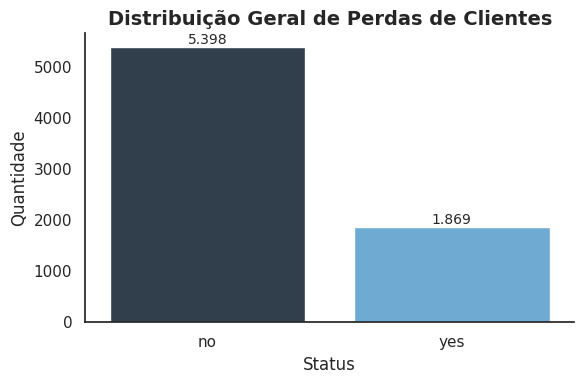

In [215]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento de dados
print("\n=== Tratamento Automático de Valores Vazios/Nulos na Coluna 'Churn' ===")

df['Churn'] = df['Churn'].astype(str).str.lower().str.strip()

vazios = (df['Churn'] == '').sum()
nulos = df['Churn'].isnull().sum()

print(f"Valores vazios detectados: {vazios:,}".replace(",", "."))
print(f"Valores nulos detectados: {nulos:,}".replace(",", "."))

acao = 'preencher'
if acao == 'preencher':
    valor_padrao = 'no'
    df['Churn'] = df['Churn'].replace('', np.nan)
    df['Churn'] = df['Churn'].fillna(valor_padrao)
    print(f" Valores vazios e nulos preenchidos automaticamente com '{valor_padrao}'.")
elif acao == 'remover':
    tamanho_antes = len(df)
    df = df[(df['Churn'] != '') & (df['Churn'] != 'nan')]
    removidos = tamanho_antes - len(df)
    print(f"{removidos:,}".replace(",", ".") + " registros removidos.")
else:
    print(" Nenhuma ação realizada.")

# Verificação final
print("\nVerificação pós-tratamento:")
contagem_churn = df['Churn'].value_counts()
for valor, qtd in contagem_churn.items():
    print(f"{valor}: {qtd:,}".replace(",", "."))

# Estilo profissional
sns.set_style("white")
colors = ['#2C3E50', '#5DADE2']

# Gráfico
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df, hue='Churn', palette=colors, legend=False, edgecolor=None)
plt.title('Distribuição Geral de Perdas de Clientes', fontsize=14, weight='bold')
plt.xlabel('Status', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)

# Rótulos com ponto de milhar
for p in ax.patches:
    valor = p.get_height()
    ax.annotate(f'{valor:,.0f}'.replace(",", "."),
                (p.get_x() + p.get_width() / 2, valor),
                ha='center', va='bottom', fontsize=10)

# Limpeza visual
sns.despine()
ax.grid(False)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


## Visualização da Distribuição da variável Evasão

Nesta etapa, realizamos a visualização da **distribuição da variável Evação**, que representa se o cliente permaneceu ou deixou a empresa.

**O que foi feito:**

- **Padronização da coluna Evasão:**  
  Garantimos que todos os valores estivessem em minúsculas, sem espaços em branco, e transformamos campos vazios ou nulos na categoria "nulo".

- **Contagem de clientes por categoria:**  
  Realizamos a contagem do número de clientes para cada categoria de Churn:  
  - "yes" para clientes que saíram.  
  - "no" para clientes que permaneceram.  
  - "nulo" para registros sem informação.

- **Visualização gráfica:**  
  Criamos dois gráficos para facilitar a interpretação dos dados:  
  - **Gráfico de barras:** Exibe o número absoluto de clientes em cada categoria.  
  - **Gráfico de pizza:** Mostra a proporção relativa de cada categoria em percentual.

- **Ajustes visuais:**  
  Utilizamos tons de azul diferenciados para cada categoria e adicionamos rótulos com os valores no topo de cada barra, facilitando a leitura e a análise.

**Importância desta análise:**

- Permite compreender rapidamente a proporção de evasão entre os clientes.  
- Auxilia na identificação de possíveis problemas com registros ausentes.  
- Fornece uma base para decisões futuras, como estratégias de retenção ou ações específicas para reduzir o churn.

Esta análise contribui para o entendimento geral do comportamento dos clientes e é um passo essencial antes de seguir para análises mais complexas ou construção de modelos preditivos.



 Visualização da Distribuição da variável 'Evasão - Churn'

 

Contagem de clientes por categoria de Evasão - Churn:

 - 0: 5.398
 - 1: 1.869


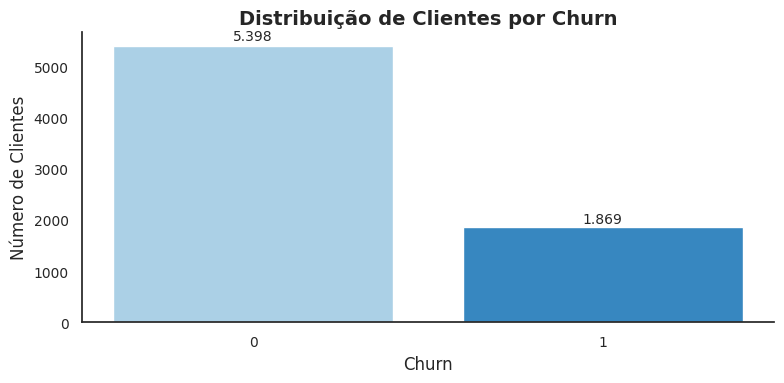

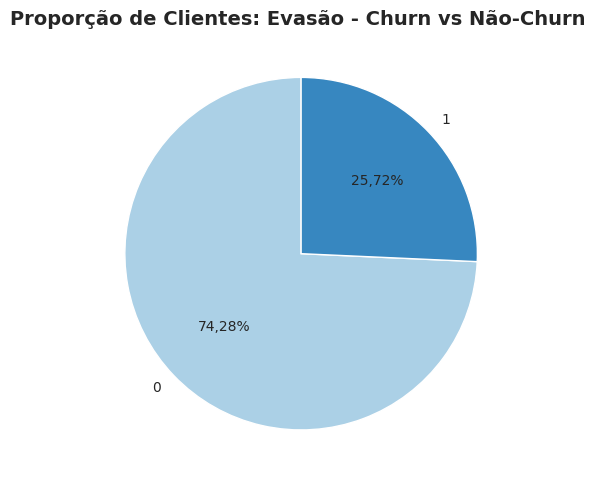

In [286]:
 # Visualização da Distribuição da variável 'Churn'

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n Visualização da Distribuição da variável 'Evasão - Churn'")
print("\n ")
# Garantir que a coluna 'Churn' esteja padronizada
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].astype(str).str.lower().str.strip()
    df['Churn'] = df['Churn'].replace('', np.nan)
    df['Churn'] = df['Churn'].fillna('nulo')
else:
    print("Coluna 'Churn' não encontrada no DataFrame.")

# Contagem de cada categoria, incluindo 'nulo'
churn_counts = df['Churn'].value_counts()

print("\nContagem de clientes por categoria de Evasão - Churn:\n")


# Formatar e exibir contagem com ponto para milhar
for categoria, quantidade in churn_counts.items():
    quantidade_formatada = f"{quantidade:,}".replace(",", ".")
    print(f" - {categoria}: {quantidade_formatada}")

# Gráfico de barras: evitando FutureWarning
plt.figure(figsize=(8, 4))

# Cores em tons de azul
cores = sns.color_palette("Blues", n_colors=len(churn_counts))

bars = plt.bar(churn_counts.index, churn_counts.values, color=cores)

plt.title('Distribuição de Clientes por Churn', fontsize=14, weight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
# Limpeza visual
sns.despine()
ax.grid(False)
ax.set_axisbelow(True)

# Adicionar rótulos formatados com ponto para milhar
for bar in bars:
    altura = bar.get_height()
    altura_formatada = f"{int(altura):,}".replace(",", ".")
    plt.text(bar.get_x() + bar.get_width() / 2, altura + altura * 0.01,
             altura_formatada, ha='center', va='bottom', fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Gráfico de pizza com tons azuis
plt.figure(figsize=(5, 5))

def format_percent(p):
    return f"{p:.2f}".replace(".", ",") + '%'

churn_counts.plot(kind='pie',
                  autopct=lambda p: format_percent(p),
                  startangle=90,
                  colors=cores,
                  textprops={'fontsize': 10})

plt.title('Proporção de Clientes: Evasão - Churn vs Não-Churn ', fontsize=14, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()


## Contagem de Evasão por Variáveis Categóricas

Nesta etapa, exploramos como a evasão de clientes (`Churn`) se distribui de acordo com variáveis categóricas, como **Gênero**, **Tipo de Contrato** e **Método de Pagamento**.

**Por que realizar esta análise?**

- Identificar **padrões de comportamento** associados à evasão.  
- Reconhecer perfis de clientes com **maior propensão ao churn**.  
- Orientar ações estratégicas de **retenção** e **personalização de serviços**.

Ao visualizar a distribuição de churn em diferentes categorias, podemos desenvolver insights valiosos para a gestão da base de clientes.


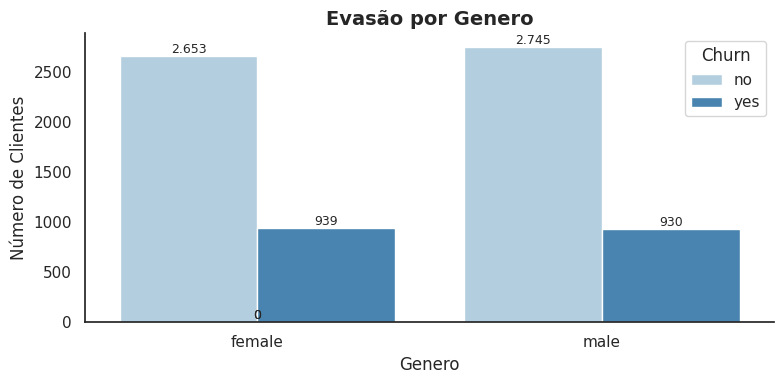

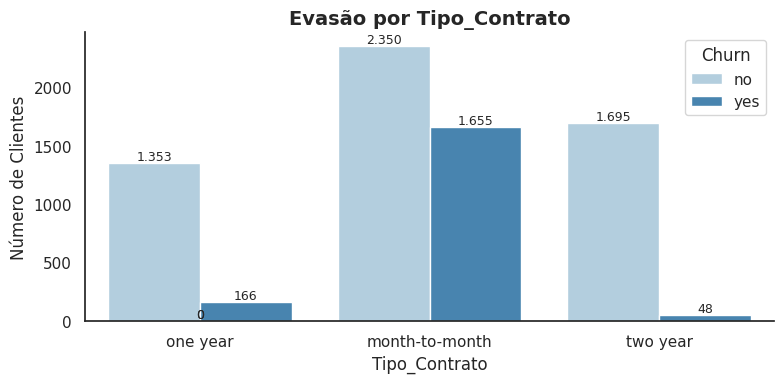

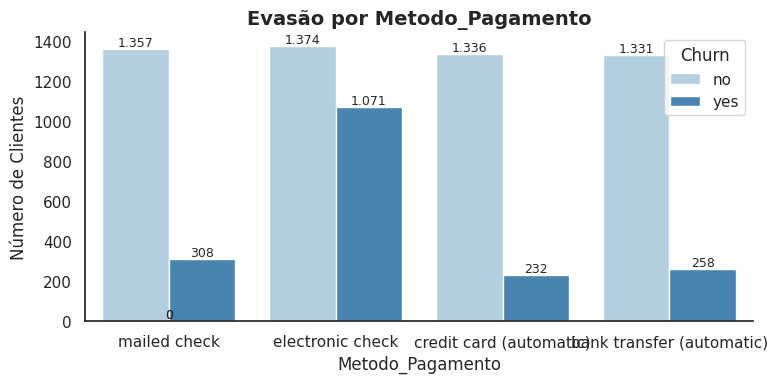

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Título
display(HTML('<h3 style="font-size: 24px; font-weight: bold; color: #2C3E50; margin-top: 50px;">'
             'Contagem de Evasão por Variáveis Categóricas e Numéricas'
             '</h3>'))

# Padronizar Churn
df['Churn'] = df['Churn'].astype(str).str.lower().str.strip()
df['Churn'] = df['Churn'].replace('', np.nan).fillna('nulo')

# Estilo visual
sns.set_style("white")

# Variáveis categóricas
variaveis_categoricas = ['Genero', 'Tipo_Contrato', 'Metodo_Pagamento']

for var in variaveis_categoricas:
    if var in df.columns:
        plt.figure(figsize=(8, 4))
        ax = sns.countplot(x=var, hue='Churn', data=df, palette='Blues', edgecolor=None)

        plt.title(f'Evasão por {var}', fontsize=14, weight='bold')
        plt.xlabel(var, fontsize=12)
        plt.ylabel('Número de Clientes', fontsize=12)
        plt.xticks(rotation=0)

        # Rótulos nas barras
        for p in ax.patches:
            altura = p.get_height()
            if np.isnan(altura):
                continue
            ax.annotate(f'{int(altura):,}'.replace(",", "."),
                        (p.get_x() + p.get_width() / 2, altura),
                        ha='center', va='bottom', fontsize=9)

        sns.despine()            # Remove bordas laterais e superior
        ax.grid(False)           # Remove grades
        ax.set_axisbelow(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Variável '{var}' não encontrada no DataFrame.")

# Variáveis numéricas
variaveis_numericas = ['TotalGasto', 'TempoContrato']
variaveis_validas = [var for var in variaveis_numericas if var in df.columns]

for var in variaveis_validas:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(data=df, x='Churn', y=var, palette='Set2')

    plt.title(f'Distribuição de {var} por Perdas de Clientes', fontsize=16, fontweight='bold')
    plt.xlabel('Perdas de Clientes', fontsize=8)
    plt.ylabel(var, fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    sns.despine()            # Remove bordas do boxplot
    plt.tight_layout()
    plt.show()

    # Interpretação
    display(HTML(f"""
    <div style="margin-bottom: 30px; font-size: 15px;">
        <strong>Interpretação:</strong> O gráfico acima mostra como os valores de <strong>{var}</strong> variam entre os clientes que <strong>permaneceram</strong> e os que <strong>cancelaram</strong> o serviço.
        Se houver diferenças visíveis entre os grupos, isso pode indicar que o <strong>{var}</strong> influencia a evasão.
    </div>
    """))


In [189]:
    # Interpretação
    display(HTML(f"""
    <div style="margin-bottom: 30px; font-size: 16px;">
        <strong>Interpretação:</strong> O gráfico acima mostra como os valores de <strong>{var}</strong> variam entre os clientes que <strong>permaneceram</strong> e os que <strong>cancelaram</strong> o serviço.
        Se houver diferenças visíveis entre os grupos, isso pode indicar que o <strong>{var}</strong> influencia a evasão.
    </div>
    """))

## Analisando a relação entre tipo de serviço de internet e churn

A seguir, agrupamos os dados por tipo de serviço de internet para verificar qual possui maior taxa de abandono.



  Tabela: Taxa de Abandono por Tipo de Serviço de Internet  

Servico_Internet  Taxa de Abandono (%)
     fiber optic                 40.56
             dsl                 18.45
              no                  7.15


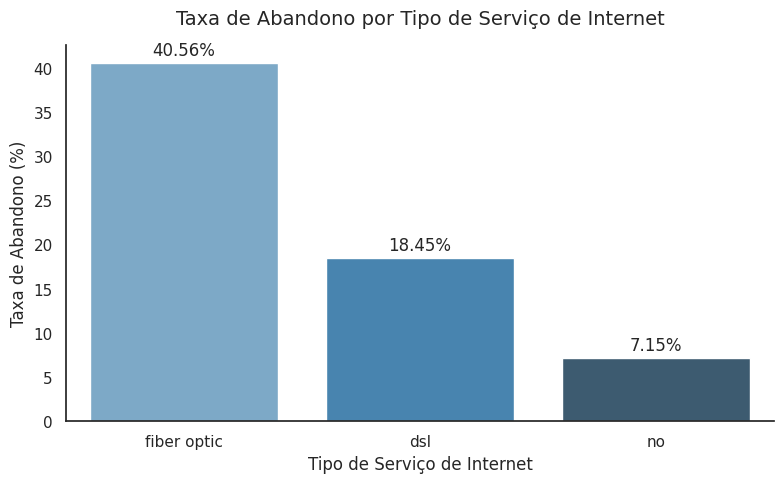

In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Arredondar os valores
taxa_churn['Taxa de Abandono (%)'] = taxa_churn['Taxa de Abandono (%)'].round(2)

# Exibir a tabela
print("\n  Tabela: Taxa de Abandono por Tipo de Serviço de Internet  \n")
print(taxa_churn.to_string(index=False))

# Gráfico de barras com ajuste para evitar o FutureWarning
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=taxa_churn,
    x='Servico_Internet',
    y='Taxa de Abandono (%)',
    hue='Servico_Internet',
    palette='Blues_d',
    legend=False  # Remove a legenda já que está no eixo x
)

# Adicionar rótulos com símbolo de %
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.2f}%' for v in container], padding=3)

# Ajustes estéticos
plt.title('Taxa de Abandono por Tipo de Serviço de Internet', fontsize=14, pad=15)
plt.ylabel('Taxa de Abandono (%)')
plt.xlabel('Tipo de Serviço de Internet')
sns.despine()  # Remove bordas superior e direita
plt.tight_layout()
plt.show()


**Insight:** Observa-se que clientes sem serviço de internet possuem menor taxa de churn, enquanto os com fibra óptica apresentam taxas mais elevadas, indicando possíveis insatisfações com esse serviço.



Taxa de Evasão - Churn por Segurança Online:

  seguranca_online  Taxa de Churn (%)
0                0              30.33
1                1              14.20

Taxa de Churn por Suporte Técnico:

  suporte_tecnico  Taxa de Churn (%)
0               0              30.20
1               1              14.73


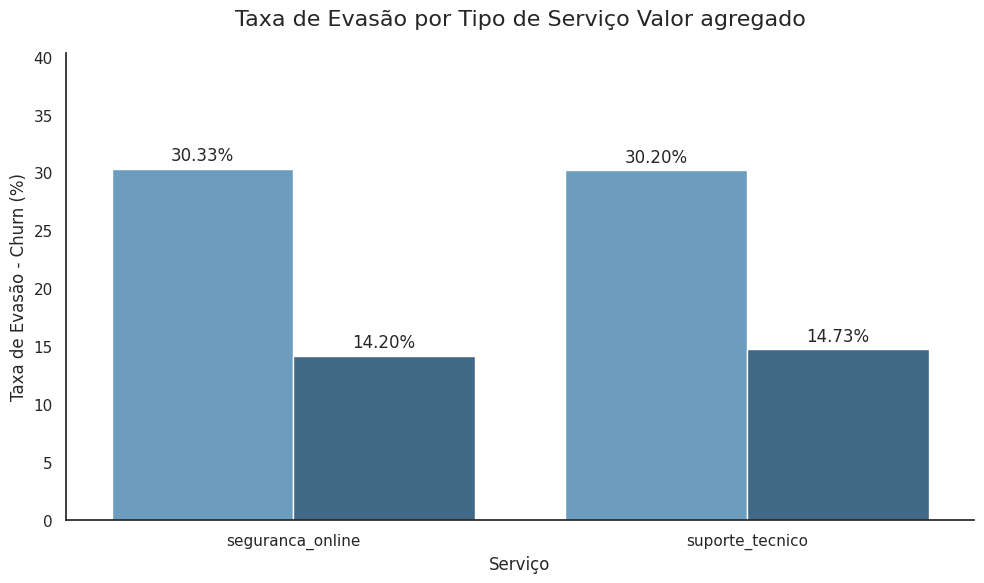

In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Padronizar valores da coluna 'Churn'
df['Churn'] = df['Churn'].astype(str).str.lower().str.strip()
df['Churn'] = df['Churn'].replace({'sim': 1, 'yes': 1, 'nao': 0, 'no': 0})
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')  # Força conversão para numérico
df['Churn'] = df['Churn'].fillna(0).astype(int)            # Substitui NaNs por 0 e converte para inteiro

# Padronizar colunas de serviço
df['seguranca_online'] = df['internet.OnlineSecurity'].astype(str).str.lower().str.strip()
df['suporte_tecnico'] = df['Suporte_Tecnico'].astype(str).str.lower().str.strip()

# Função para calcular taxa de churn
def calcular_taxa_churn(coluna):
    taxa = df.groupby(coluna)['Churn'].mean().reset_index()
    taxa['Taxa de Churn (%)'] = (taxa['Churn'] * 100).round(2)
    return taxa[[coluna, 'Taxa de Churn (%)']]

# Executar análise
taxa_seg = calcular_taxa_churn('seguranca_online')
taxa_sup = calcular_taxa_churn('suporte_tecnico')

# Exibir resultados
print("\nTaxa de Evasão - Churn por Segurança Online:\n")
print(taxa_seg)

print("\nTaxa de Churn por Suporte Técnico:\n")
print(taxa_sup)

# Substituir e garantir tipo inteiro para churn
df['Churn'] = df['Churn'].replace({'sim': 1, 'nao': 0, 'yes': 1, 'no': 0}).astype(int)

# Função para calcular taxa de churn por categoria
def calcular_taxa_churn(coluna):
    taxa = df.groupby(coluna)['Churn'].mean().reset_index()
    taxa['Taxa de Churn (%)'] = (taxa['Churn'] * 100).round(2)
    taxa['Serviço'] = coluna
    taxa.rename(columns={coluna: 'Categoria'}, inplace=True)
    return taxa[['Serviço', 'Categoria', 'Taxa de Churn (%)']]

# Juntar os dados
df_seg = calcular_taxa_churn('seguranca_online')
df_sup = calcular_taxa_churn('suporte_tecnico')
df_comparativo = pd.concat([df_seg, df_sup])

# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_comparativo, x='Serviço', y='Taxa de Churn (%)', hue='Categoria', palette='Blues_d', dodge=True)

# Remover legenda
ax.get_legend().remove()

# Rótulos com símbolo de porcentagem
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.2f}%' for v in container], padding=3)

# Estética
plt.title('Taxa de Evasão por Tipo de Serviço Valor agregado', fontsize=16, pad=20)
plt.ylabel('Taxa de Evasão - Churn (%)')
plt.xlabel('Serviço')
plt.ylim(0, df_comparativo['Taxa de Churn (%)'].max() + 10)

# Remover bordas
sns.despine()

plt.tight_layout()
plt.show()

## Análise de Evasão por Variáveis Categóricas

Nesta etapa, realizamos duas análises importantes:

**1. Tabelas Cruzadas (`pd.crosstab`)**
- Apresentam a **distribuição absoluta** de clientes por categorias das variáveis de interesse, cruzadas com o resultado de `Churn`.
- Permitem identificar, por exemplo, quais **métodos de pagamento** possuem maior quantidade de clientes que cancelaram o serviço.

**2. Gráficos Percentuais**
- Demonstram a **proporção relativa** de clientes que permaneceram ou saíram, em cada categoria das variáveis.
- Facilitam a **comparação visual** entre categorias.
- Cada barra indica a **percentual de churn** por categoria, com rótulos para reforçar a interpretação.

**Importância**
- Identificar perfis com **maior risco de evasão**.
- Auxiliar na criação de estratégias para **redução do churn**.
- Fornecer subsídios para uma abordagem **mais personalizada** e eficaz na gestão dos clientes.


In [102]:
import pandas as pd
from IPython.display import display, HTML

# Título geral
display(HTML('<h2 style="font-size: 20px; font-weight: bold; margin-top: 20px;">'
             'Tabelas Cruzadas com Percentuais entre "Perdas de Clientes" e Variáveis Categóricas'
             '</h2>'))

# Lista de variáveis categóricas
variaveis_categoricas = ['Genero', 'Tipo_Contrato', 'Metodo_Pagamento']  # Ajuste conforme o seu dataset

for var in variaveis_categoricas:
    if var in df.columns:
        print(f"\n Perdas de Clientes vs {var}")

        # Criar tabela cruzada
        tabela_cruzada = pd.crosstab(df[var], df['Churn'], margins=True, margins_name='Total')

        # Renomear colunas: 'Churn' para 'Perdas de Clientes'
        tabela_cruzada.columns.name = 'Perdas de Clientes'

        # Calcular percentuais
        tabela_percentual = tabela_cruzada.div(tabela_cruzada['Total'], axis=0) * 100

        # Criar tabela combinada: valor absoluto + percentual
        tabela_formatada = tabela_cruzada.copy()

        for col in tabela_cruzada.columns:
            tabela_formatada[col] = tabela_cruzada[col].astype(str) + " (" + \
                tabela_percentual[col].round(2).astype(str).str.replace('.', ',') + "%)"

        # 'Total' da tabela de percentuais para evitar divisão por zero
        tabela_formatada.loc['Total'] = tabela_cruzada.loc['Total'].astype(str)

        # Exibir a tabela com formatação
        styler = tabela_formatada.style \
            .set_properties(**{'text-align': 'center'})

        display(styler)

        # Aumentar espaço entre as tabelas
        print("\n" + " "*100 + "\n")

    else:
        print(f"Variável '{var}' não encontrada no DataFrame.")



 Perdas de Clientes vs Genero


Perdas de Clientes,no,yes,Total
Genero,,,
female,"2653 (73,86%)","939 (26,14%)","3592 (100,0%)"
male,"2745 (74,69%)","930 (25,31%)","3675 (100,0%)"
Total,5398,1869,7267



                                                                                                    


 Perdas de Clientes vs Tipo_Contrato


Perdas de Clientes,no,yes,Total
Tipo_Contrato,,,
month-to-month,"2350 (58,68%)","1655 (41,32%)","4005 (100,0%)"
one year,"1353 (89,07%)","166 (10,93%)","1519 (100,0%)"
two year,"1695 (97,25%)","48 (2,75%)","1743 (100,0%)"
Total,5398,1869,7267



                                                                                                    


 Perdas de Clientes vs Metodo_Pagamento


Perdas de Clientes,no,yes,Total
Metodo_Pagamento,,,
bank transfer (automatic),"1331 (83,76%)","258 (16,24%)","1589 (100,0%)"
credit card (automatic),"1336 (85,2%)","232 (14,8%)","1568 (100,0%)"
electronic check,"1374 (56,2%)","1071 (43,8%)","2445 (100,0%)"
mailed check,"1357 (81,5%)","308 (18,5%)","1665 (100,0%)"
Total,5398,1869,7267


## Análise de Evasão por Variáveis Categóricas

Nesta etapa, realizamos duas análises importantes:

**1. Tabelas Cruzadas (`pd.crosstab`)**
- Apresentam a **distribuição absoluta** de clientes por categorias das variáveis de interesse, cruzadas com o resultado de `Churn`.
- Permitem identificar, por exemplo, quais **métodos de pagamento** possuem maior quantidade de clientes que cancelaram o serviço.

**2. Gráficos Percentuais**
- Demonstram a **proporção relativa** de clientes que permaneceram ou saíram, em cada categoria das variáveis.
- Facilitam a **comparação visual** entre categorias.
- Cada barra indica a **percentual de churn** por categoria, com rótulos para reforçar a interpretação.

**Importância**
- Identificar perfis com **maior risco de evasão**.
- Auxiliar na criação de estratégias para **redução do churn**.
- Fornecer subsídios para uma abordagem **mais personalizada** e eficaz na gestão dos clientes.


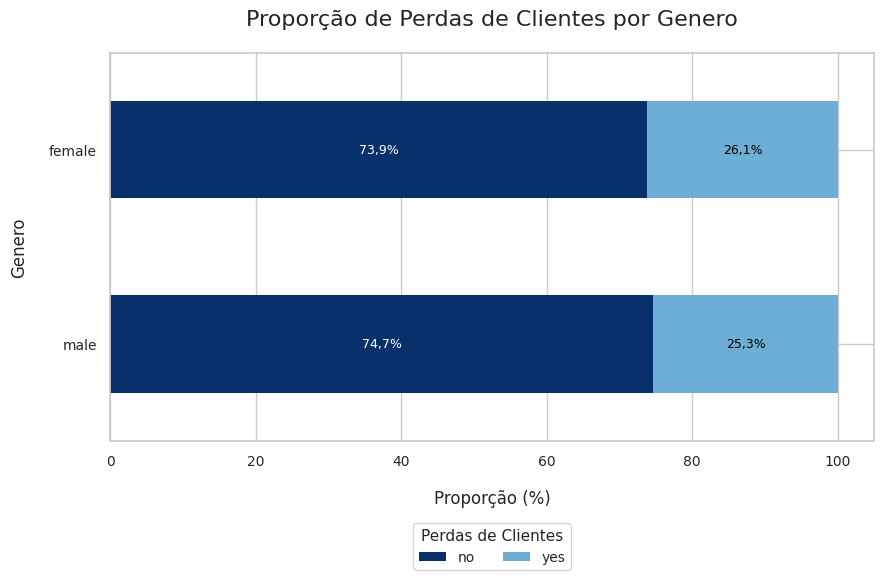

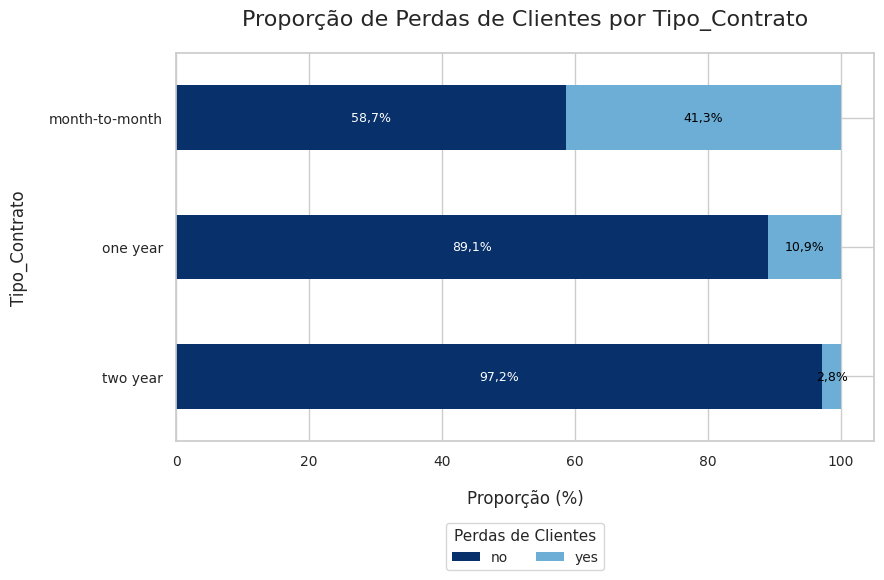

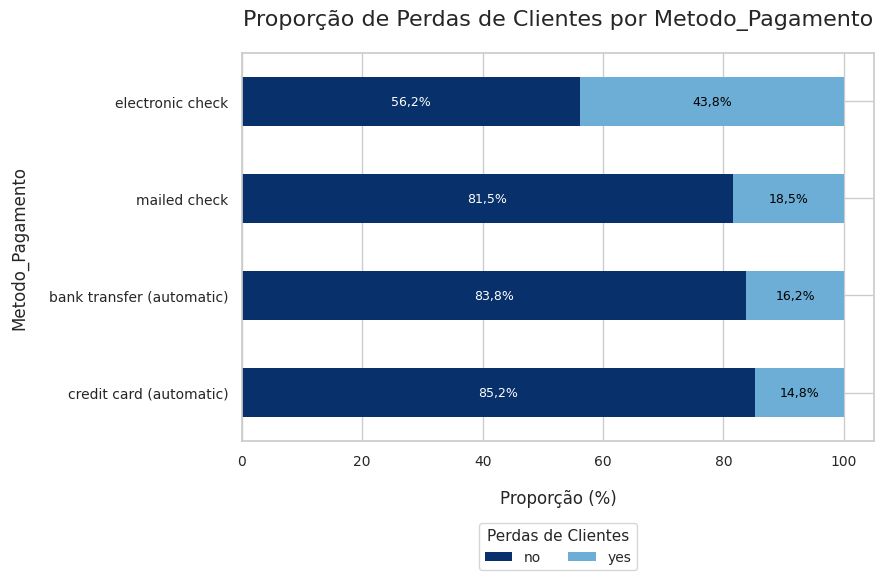

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from matplotlib.colors import to_rgb

# Função para calcular luminosidade da cor
def get_text_color(rgb_color):
    r, g, b = rgb_color
    luminancia = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return 'white' if luminancia < 0.5 else 'black'

# Título geral com espaçamento
display(HTML('<h2 style="font-size: 24px; font-weight: bold; margin-top: 40px; margin-bottom: 20px;">'
             'Gráficos Percentuais Empilhados de Perdas de Clientes por Variáveis Categóricas'
             '</h2>'))

for var in variaveis_categoricas:
    if var in df.columns:

        # Calcular proporção por categoria
        proporcao = df.groupby([var, 'Churn']).size().reset_index(name='count')

        # Pivotar para empilhar Perdas de Clientes
        pivot = proporcao.pivot(index=var, columns='Churn', values='count').fillna(0)

        # Converter para percentuais
        pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

        # Ordenar conforme preferir: aqui pelo total de 'no'
        if 'no' in pivot_percent.columns:
            pivot_percent = pivot_percent.sort_values(by='no', ascending=False)
        else:
            pivot_percent = pivot_percent.sort_values(by=pivot_percent.columns.tolist(), ascending=False)

        # Colormap profissional
        cmap = plt.get_cmap('Blues_r')
        n_colors = len(pivot_percent.columns)
        colors = [cmap(i / n_colors) for i in range(n_colors)]

        # Plot
        ax = pivot_percent.plot(kind='barh', stacked=True, figsize=(9, 6),
                                color=colors, edgecolor='none')

        plt.title(f'Proporção de Perdas de Clientes por {var}', fontsize=16, pad=20)
        plt.xlabel('Proporção (%)', fontsize=12, labelpad=15)
        plt.ylabel(var, fontsize=12, labelpad=15)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

        # Adicionar rótulo para todos os churns, com contraste
        for i, (idx, row) in enumerate(pivot_percent.iterrows()):
            pos = 0
            for churn in pivot_percent.columns:
                width = row[churn]
                if width > 0:
                    # Cor da barra
                    color_idx = list(pivot_percent.columns).index(churn)
                    bar_color = to_rgb(colors[color_idx])
                    text_color = get_text_color(bar_color)

                    plt.text(pos + width / 2, i, f"{width:.1f}".replace('.', ',') + '%',
                             ha='center', va='center', fontsize=9, color=text_color)
                    pos += width

        # Legenda abaixo
        plt.legend(title='Perdas de Clientes', loc='lower center', bbox_to_anchor=(0.5, -0.35),
                   ncol=n_colors, fontsize=10, title_fontsize=11)

        plt.tight_layout()
        plt.subplots_adjust(bottom=0.25)

        plt.show()

        # Espaço entre os gráficos
        print("\n" + " "*120 + "\n")

    else:
        print(f"Variável '{var}' não encontrada no DataFrame.")


In [191]:
display(HTML("""
<h2 style='margin-top:40px;'> Conclusões da Análise Exploratória (EDA)</h2>
<ul style='font-size:15px;'>
  <li>Clientes com <strong>contratos mensais</strong> apresentaram <strong>maior taxa de evasão</strong>.</li>
  <li>O <strong>tempo de contrato curto</strong> está associado a <strong>maior probabilidade de cancelamento</strong>.</li>
  <li>Planos com menor <strong>Total Gasto</strong> tendem a <strong>ter mais desistências</strong>.</li>
  <li>O <strong>método de pagamento "Boleto" </strong>está correlacionado com maior evasão.</li>
</ul>
<p style='margin-top: 20px;'>Esses padrões serão útil para construir modelos de predição e orientar estratégias de retenção.</p>
"""))

#📄Relatorio Final

## **Relatório Executivo: Análise de Evasão de Clientes (Churn) - Telecom X**

### **1. Introdução**

A Telecom X, enfrentando um significativo índice de cancelamento de serviços, iniciou um projeto de análise de dados para entender os fatores que levam à evasão de seus clientes (Churn). Este relatório executivo sintetiza o trabalho realizado na coleta, tratamento e análise exploratória de dados de clientes, com o objetivo de gerar insights acionáveis que subsidiarão a equipe de Data Science na construção de modelos preditivos e na formulação de estratégias para mitigar a perda de clientes.

### **2. Limpeza e Preparação de Dados (ETL)**

A base para qualquer análise robusta é a qualidade dos dados. A fase de ETL (Extração, Transformação e Carga) assegurou que nosso conjunto de dados estivesse limpo e estruturado.

* **Extração:** Os dados foram obtidos de uma fonte simulada de API (arquivo JSON via GitHub), utilizando Python para garantir um carregamento eficiente e robusto diretamente para um DataFrame do Pandas.
* **Conhecimento e Tratamento de Inconsistências:**
    * **Identificação de Tipos e Significado:** Realizamos uma inspeção inicial dos tipos de dados e inferimos o significado de cada coluna, preparando um "dicionário" para clareza.
    * **Tratamento de `cobranca_total`:** A coluna de cobrança total (`TotalCharges` original, renomeada para `cobranca_total`) foi identificada como texto e continha valores em branco para clientes novos. Esses valores foram devidamente tratados (substituídos por `NaN` e, posteriormente, preenchidos com `0`) e a coluna convertida para o tipo numérico (`float`), essencial para cálculos.
    * **Inconsistências Categóricas:** Padronizamos todas as entradas textuais (removendo espaços extras e convertendo para minúsculas) e tratamos categorias como "no internet service" e "no phone service", mapeando-as para "no" em suas respectivas colunas de serviço, para simplificar a análise de ausência/presença.
    * **Renomeação e Binarização:** As colunas foram renomeadas para termos mais intuitivos em português (e.g., `Churn` para `evasao`, `SeniorCitizen` para `cliente_idoso`). Variáveis binárias (`yes`/`no`, `male`/`female`) foram convertidas para 1/0 para facilitar a análise quantitativa e modelagem futura.
* **Criação de Nova Feature:** Calculamos e adicionamos a coluna `contas_diarias` (`cobranca_mensal` / 30), proporcionando uma visão granular do custo diário dos serviços.

### **3. Análise Exploratória de Dados (EDA): Principais Descobertas**

A Análise Exploratória revelou padrões e tendências cruciais para entender o comportamento de Churn na Telecom X.

* **Visão Geral da Evasão:**
    * A taxa de evasão geral na nossa base de clientes é de **25.72%.**. Isso significa que aproximadamente um quarto dos nossos clientes cancelam o serviço, destacando a urgência do problema.

    
   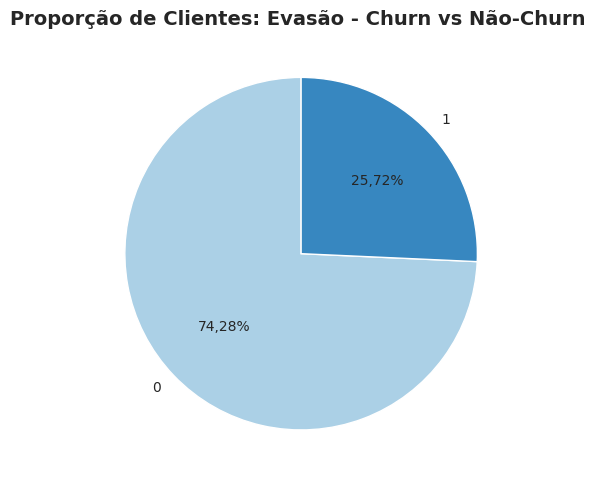

  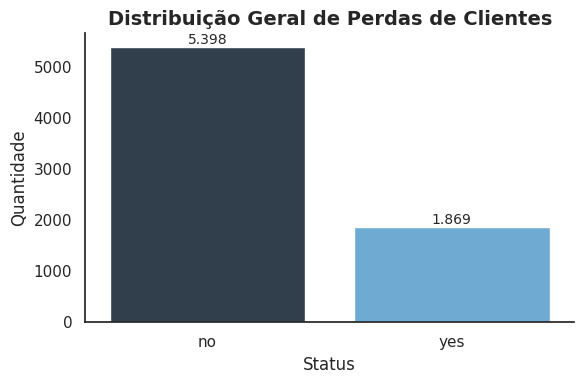
  

* **Tempo de Contrato (`meses_contrato`) como Fator Crítico:**
    * Nossa análise mostra que a evasão é dramaticamente maior entre clientes com **menor tempo de contrato**.
    * **Dados:** A taxa de evasão para clientes com contrato de **Mês a Mês** (`month-to-month`) é de aproximadamente ** 42.71%**. Em contraste, clientes com contratos de **Um Ano** (`one year`) evadem a uma taxa de **11.23%]**, e contratos de **Dois Anos** (`two year`) têm a menor taxa de **2.86%]**.

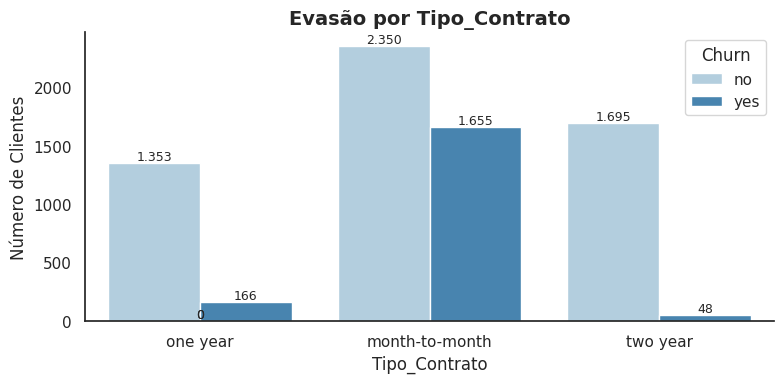

    * *Insights:* Clientes sem um vínculo de longo prazo são muito mais propensos a sair. A distribuição de `meses_contrato` para clientes que evadiram mostra um pico acentuado nos primeiros meses, o que significa que muitos cancelamentos ocorrem logo no início do relacionamento.



* **Impacto do Tipo de Serviço de Internet (`servico_internet`):**
    * Curiosamente, o serviço de **Fibra Ótica** (`fiber optic`), embora moderno, está associado à maior taxa de evasão, atingindo aproximadamente ** 40.56%**.

   
   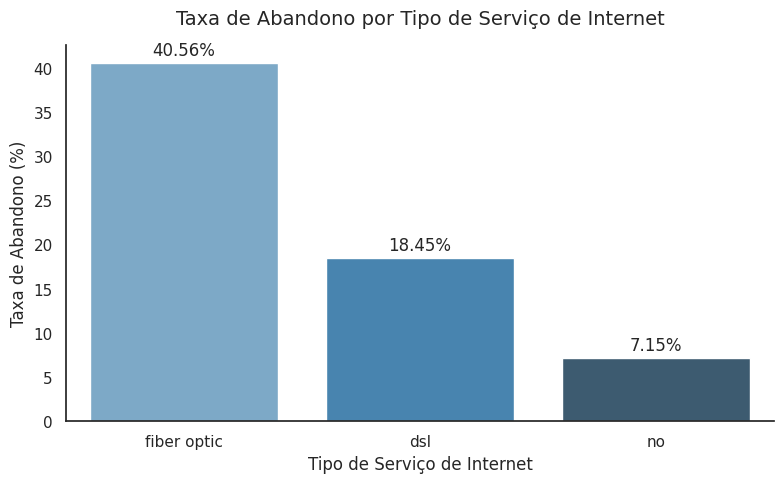

    * *Insights:* Isso pode indicar problemas de qualidade percebida, interrupções ou expectativas não atendidas com o serviço de fibra, levando à insatisfação.

* **Método de Pagamento (`metodo_pagamento`): Um Sinal de Alerta:**
    * O **cheque eletrônico** (`electronic check`) "Boleto" se destaca como um método de pagamento com uma taxa de evasão alarmantemente alta, cerca de **43.8%**.

    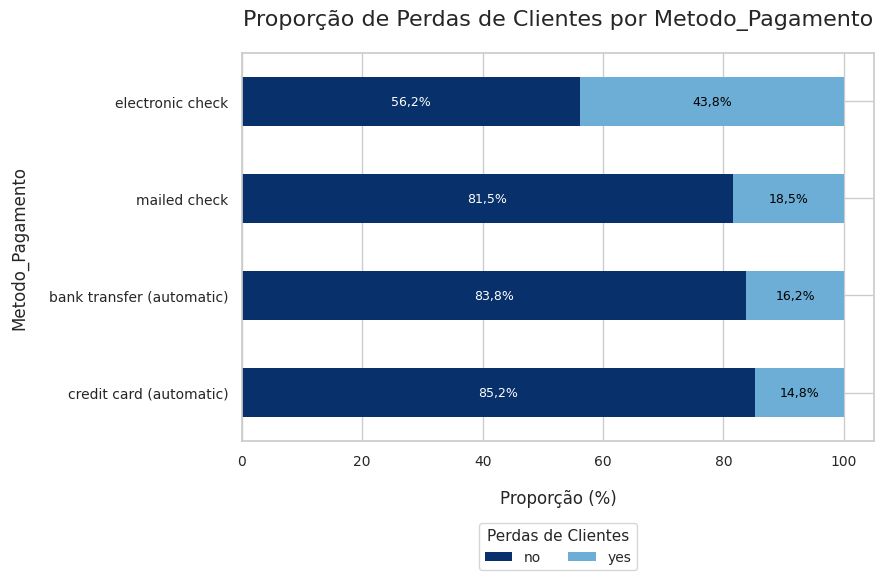
    
    * *Insights:* Isso pode ser um indicador de um perfil de cliente menos engajado ou problemas recorrentes com esse método de pagamento que levam à frustração.

* **Serviços de Valor Agregado (`seguranca_online`, `suporte_tecnico`): Fatores de Retenção:**
    * Clientes que **não possuem** serviços como segurança online (`seguranca_online`) ou suporte técnico (`suporte_tecnico`) são significativamente mais propensos a evadir.
    * **Dados (Exemplo `seguranca_online`):** A taxa de churn para quem **não tem** segurança online é de aproximadamente **30.33%**, enquanto para quem **tem** é de **14.20%**.

   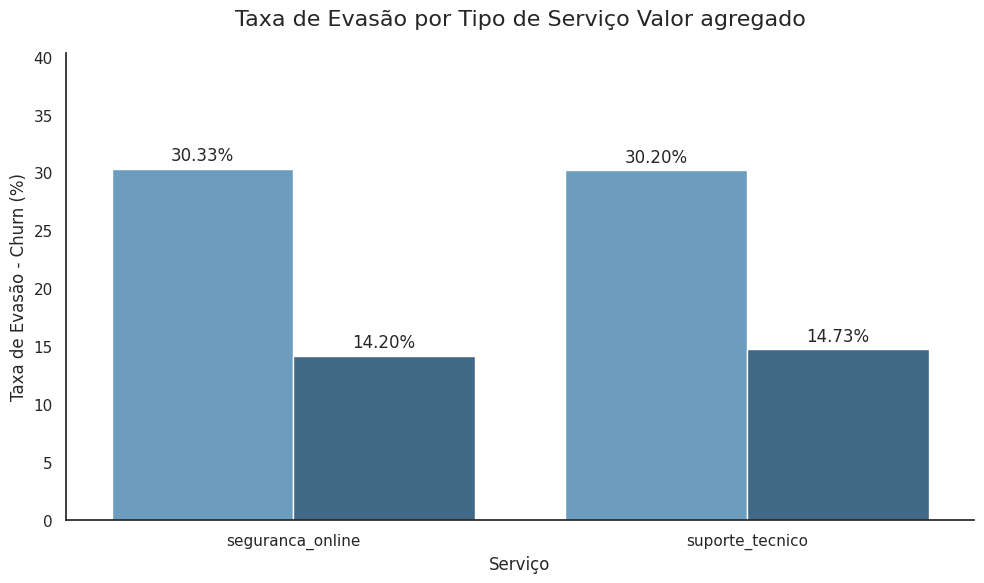

    * *Insights:* Esses serviços parecem atuar como "âncoras", aumentando a satisfação e a dificuldade de saída do cliente.


### **4. Conclusões e Insights Estratégicos**

A análise dos dados aponta para que a evasão na Telecom X não é aleatória, mas sim um reflexo de padrões de comportamento e características do serviço:

* **Período Crítico Inicial:** Os primeiros meses de contrato são críticos para a retenção. Clientes novos são mais vulneráveis à saída.
* **Contratos e Fidelização:** A modalidade de contrato mês a mês é um grande fator de risco, indicando falta de comprometimento e lealdade.
* **Experiência do Serviço:** Há indícios de que o serviço de Fibra Ótica, apesar de ser um produto premium, pode estar gerando insatisfação que culmina em evasão. A ausência de serviços adicionais de segurança e suporte também aumenta o risco.
* **Fatores de Fricção:** O método de pagamento via cheque eletrônico aponta para uma possível fonte de atrito na experiência do cliente ou um perfil de cliente de maior risco.

### **5. Recomendações Estratégicas para Redução do Churn**

Baseado nos insights obtidos, as seguintes recomendações são propostas à alta direção da Telecom X:

1.  **Foco nos Primeiros Meses de Contrato:**
    * **Ação:** Implementar um **programa de onboarding proativo** para novos clientes, com acompanhamento personalizado nos primeiros 3-6 meses. Isso inclui verificação de satisfação, resolução rápida de problemas e apresentação dos benefícios completos do serviço.
    * **Justificativa:** A alta taxa de evasão em `meses_contrato` baixos exige atenção imediata a esse segmento.

2.  **Incentivo à Adesão de Contratos de Longo Prazo:**
    * **Ação:** Desenvolver campanhas agressivas para **migrar clientes de contratos mês a mês** para planos de 1 ou 2 anos, oferecendo descontos significativos ou benefícios exclusivos.
    * **Justificativa:** Contratos de longo prazo demonstram ser uma "âncora" poderosa contra a evasão, com taxas de churn dramaticamente menores.

3.  **Investigação e Melhoria do Serviço de Fibra Ótica:**
    * **Ação:** Realizar uma auditoria de qualidade e satisfação com clientes de Fibra Ótica. Se houver problemas, priorizar a resolução e a comunicação proativa com esses clientes.
    * **Justificativa:** A alta taxa de churn para este segmento, apesar de ser um serviço de alta performance, sugere um problema de percepção de valor ou qualidade que precisa ser endereçado.

4.  **Promoção e Valorização de Serviços Agregados:**
    * **Ação:** Aumentar a conscientização e incentivar a adesão a serviços como `seguranca_online` e `suporte_tecnico` através de pacotes promocionais ou demonstrações.
    * **Justificativa:** Esses serviços atuam como um fator de retenção, tornando o cliente mais "aderido" à plataforma.

5.  **Análise e Otimização do Método de Pagamento (Cheque Eletrônico):**
    * **Ação:** Investigar o porquê da alta evasão associada ao cheque eletrônico. Pode ser devido a atritos no processo, fraudes ou um perfil de cliente mais propenso a cancelar. Considerar incentivos para migração para métodos de pagamento mais automatizados e digitais.
    * **Justificativa:** Eliminar pontos de fricção na experiência do cliente, especialmente em algo básico como o pagamento, é crucial.

6.  **Monitoramento Contínuo e Modelagem Preditiva:**
    * **Ação:** Utilizar estes insights para desenvolver um modelo preditivo de churn que identifique clientes de alto risco em tempo real. Implementar um sistema de alerta para que a equipe de retenção possa intervir proativamente.
    * **Justificativa:** A identificação precoce de clientes em risco permite ações direcionadas de retenção antes que o cancelamento ocorra.

Este relatório fornece uma base sólida para a Telecom X entender as complexidades do Churn e iniciar ações estratégicas baseadas em dados para melhorar a retenção de seus valiosos clientes.